In [24]:
from binomial_pricer import binomialPricer, binomialPricer1, AmericanOption, PayoffType, crrBinomialG, crrCalib, jrrnCalib, jreqCalib, tianCalib, EuropeanOption
from greeks import greekType, binomialGreeks
import time
import numpy as np
from enum import Enum
import math
import pandas as pd
import matplotlib.pyplot as plt

# Example: Binomial Tree Pricer
    a. European call option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 20%$
    
    b. European put option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 20%$
    
    c. European call option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 10%$
    
    d. European put option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 10%$
    
    What is the value of the portfolio that is long (a) and short (b)? How about the portfolio that long (c) and short (d)?

In [25]:
# Initialize Parameters
S = 100
strike = 105
r = 0.03
expiry = 1
sigma1 = 20
sigma2 = 10

In [26]:
euroPrc = [crrBinomialG(S, r, sigma1, EuropeanOption(expiry, strike, PayoffType.Call), 100),
            crrBinomialG(S, r, sigma1, EuropeanOption(expiry, strike, PayoffType.Put), 100),
            crrBinomialG(S, r, sigma2, EuropeanOption(expiry, strike, PayoffType.Call), 100),
            crrBinomialG(S, r, sigma2, EuropeanOption(expiry, strike, PayoffType.Put), 100)] 

In [27]:
# long a short b
print("Portfolio value (long a ;short b): %.10f" %(euroPrc[0]-euroPrc[1]))

# long c short d
print("Portfolio value (long c ;short d): %.10f" %(euroPrc[2]-euroPrc[3]))

Portfolio value (long a ;short b): -1.8967810226
Portfolio value (long c ;short d): -1.8967810226


In [28]:
# absoulate value

# long a short b
print("Absoluate portfolio value (long a ;short b): %.10f" %abs(euroPrc[0]-euroPrc[1]))

# long c short d
print("Absoluate portfolio value (long c ;short d): %.10f" %abs(euroPrc[2]-euroPrc[3]))

Absoluate portfolio value (long a ;short b): 1.8967810226
Absoluate portfolio value (long c ;short d): 1.8967810226


# Exmaple: Greeks
### Greeks of Binomial Tree Models with different Calibrations

In [34]:
class greekType():
    def Delta(S, r, vol, trade, strike, n, calib):
        delta = (binomialPricer(S+0.001*S, r, vol, trade, n, calib) 
                - binomialPricer(S-0.001*S, r, vol, trade, n, calib)
                ) / (2*0.001*S)
        return delta

    def Gamma(S, r, vol, trade, strike, n, calib):
        gamma = (binomialPricer(S+0.001*S, r, vol, trade, n, calib) 
                - 2 * binomialPricer(S, r, vol, trade, n, calib) 
                + binomialPricer(S-0.001*S, r, vol, trade, n, calib)
                ) / (0.001*S)**2
        return gamma

    def Vega(S, r, vol, trade, strike, n, calib):
        vega = (binomialPricer(S, r, vol+0.001, trade, n, calib)
                - binomialPricer(S, r, vol-0.001, trade, n, calib)
                ) / (0.001*2)
        return vega

    def Theta(S, r, vol, trade, strike, n, calib):
        Theta = (binomialPricer1(S, r, vol, trade, n, calib)
                - binomialPricer(S, r, vol, trade, n, calib)
                ) / (0.004*2)
        return Theta

    def Rho(S, r, vol, trade, strike, n, calib):
        rho = (binomialPricer(S, r+0.001, vol, trade, n, calib)
                - binomialPricer(S, r-0.001, vol, trade, n, calib)
                    )/(2*0.001)
        return rho


def binomialGreeks(S, r, vol, T, strike, greekType) -> float:
    ks = range(50,150,1)
    greeks_list = []
    
    for trade in [AmericanOption, EuropeanOption]:
        for payoffType in [PayoffType.Call, PayoffType.Put]:
            for calib in [crrCalib, jrrnCalib, jreqCalib, tianCalib]:
                greek = [greekType(S, r, vol, trade(T, k, payoffType), k, n, calib) for k in ks]
                greeks_list.append(greek)
    
    return greeks_list

In [35]:
# initialize parameters
S, r, vol, t, T = 100, 0.03, 0.2, 0, 1
ks = range(50, 150)

# set n = 100
n = 100

In [36]:
name_list = []

for i in ['Am', 'Eu']:
    for j in ['Call', 'Put']:
        for c in [crrCalib, jrrnCalib, jreqCalib, tianCalib]:
            name_list.append(i+'_'+j+'_'+c.__name__)

In [37]:
def summary_df(greek_list):
    return pd.DataFrame(greek_list,
                        index = name_list,
                        columns= ks
                        ).T

In [38]:
delta_df = summary_df(binomialGreeks(S, r, vol, T, strike, greekType.Delta))
gamma_df = summary_df(binomialGreeks(S, r, vol, T, strike, greekType.Gamma))
vega_df = summary_df(binomialGreeks(S, r, vol, T, strike, greekType.Vega))
theta_df = summary_df(binomialGreeks(S, r, vol, T, strike, greekType.Theta))
rho_df = summary_df(binomialGreeks(S, r, vol, T, strike, greekType.Rho))

In [39]:
def plot_sort_calib(df):
    for c in [crrCalib, jrrnCalib, jreqCalib, tianCalib]:
        df[df.columns[df.columns.str.contains(c.__name__)]].plot()

<Axes: >

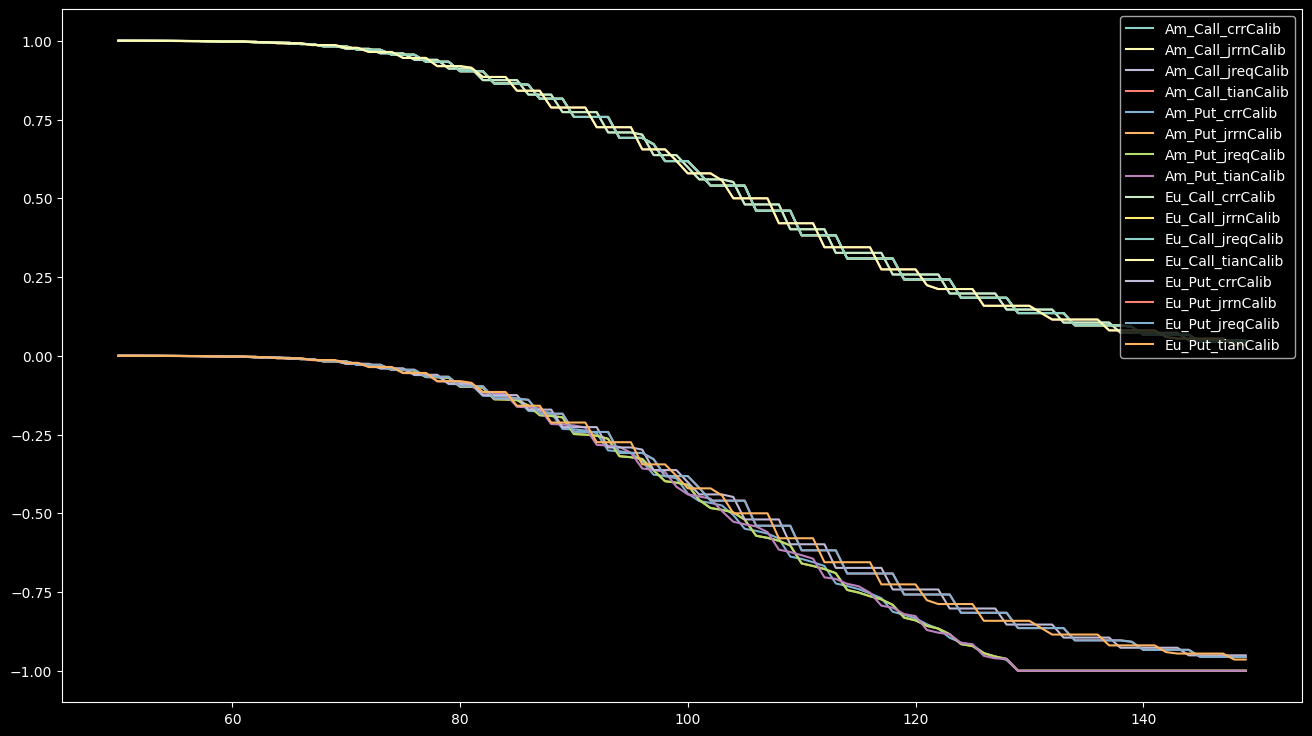

In [40]:
delta_df.plot(figsize=(16,9))

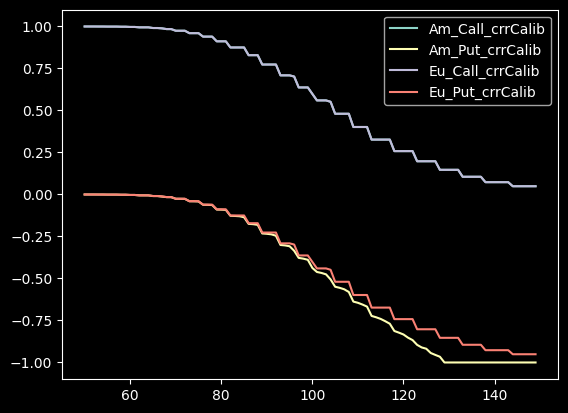

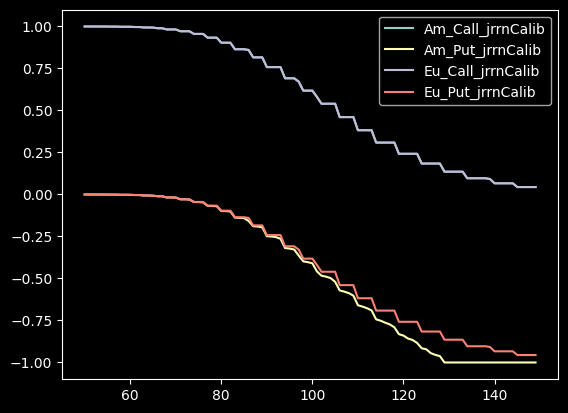

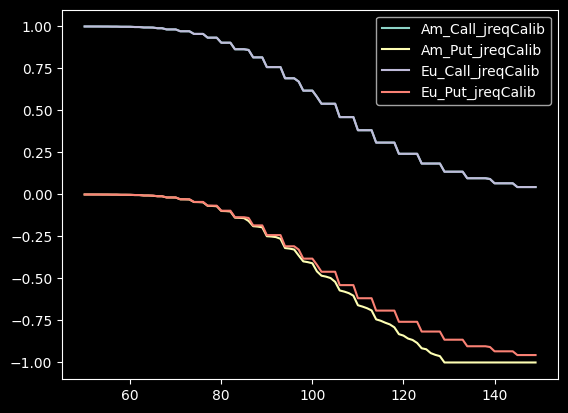

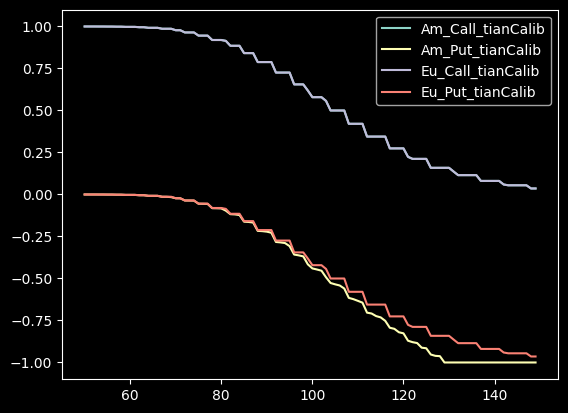

In [41]:
plot_sort_calib(delta_df)

<Axes: >

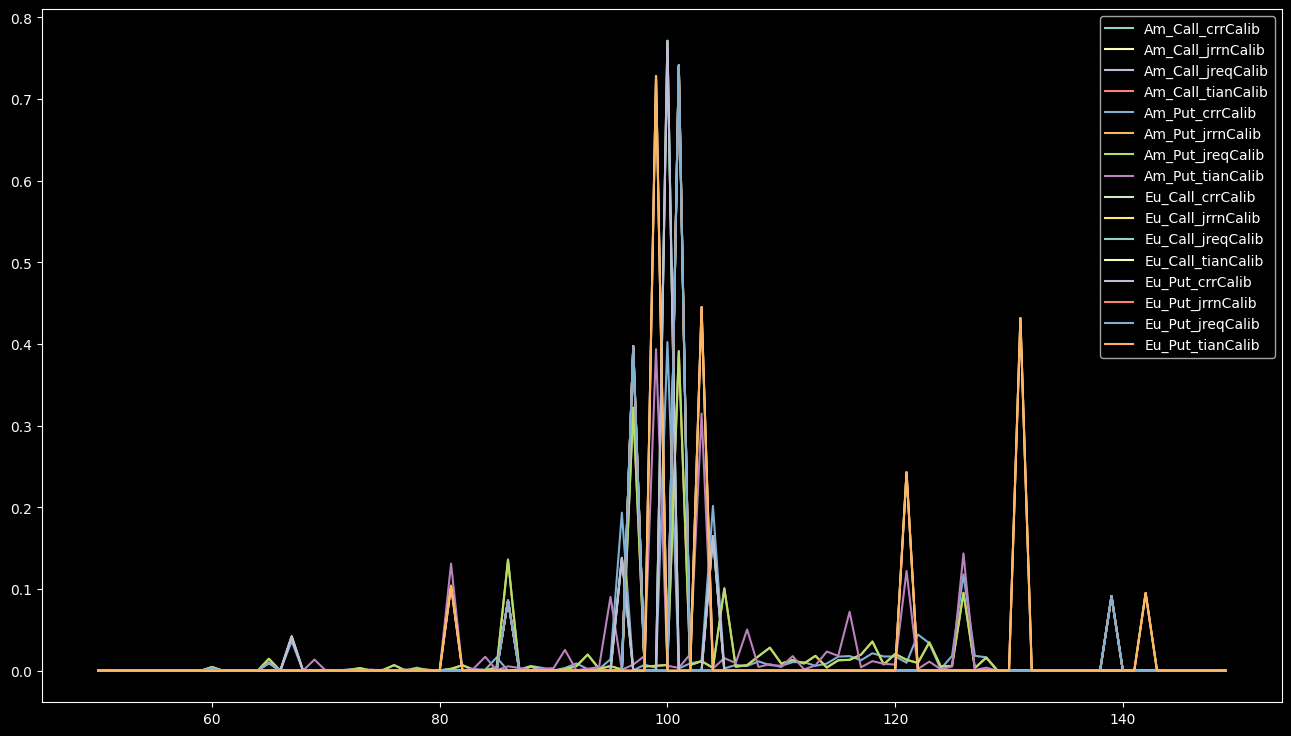

In [42]:
gamma_df.plot(figsize=(16,9))

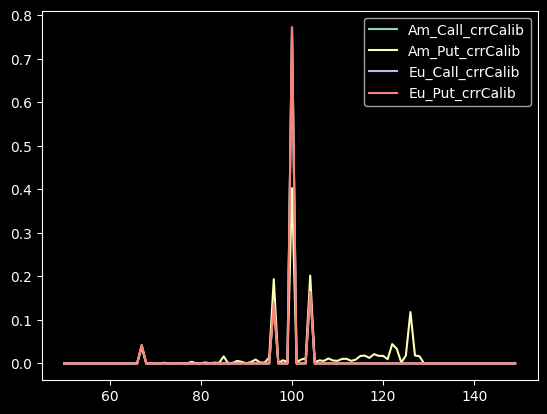

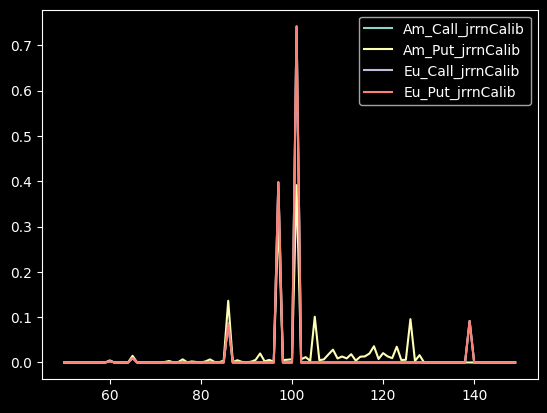

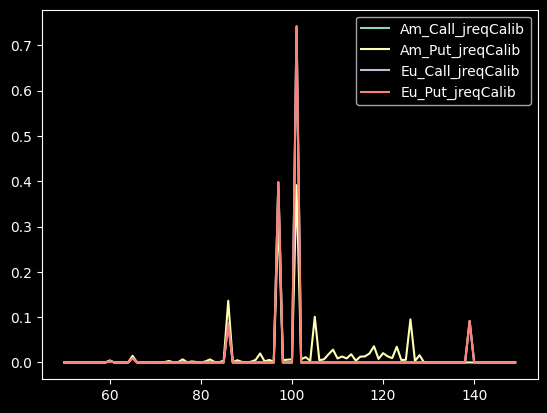

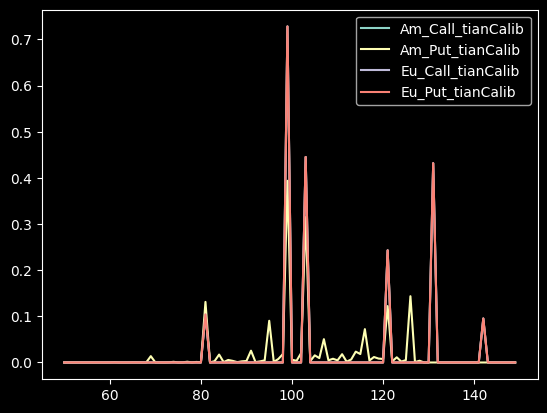

In [43]:
plot_sort_calib(gamma_df)


<Axes: >

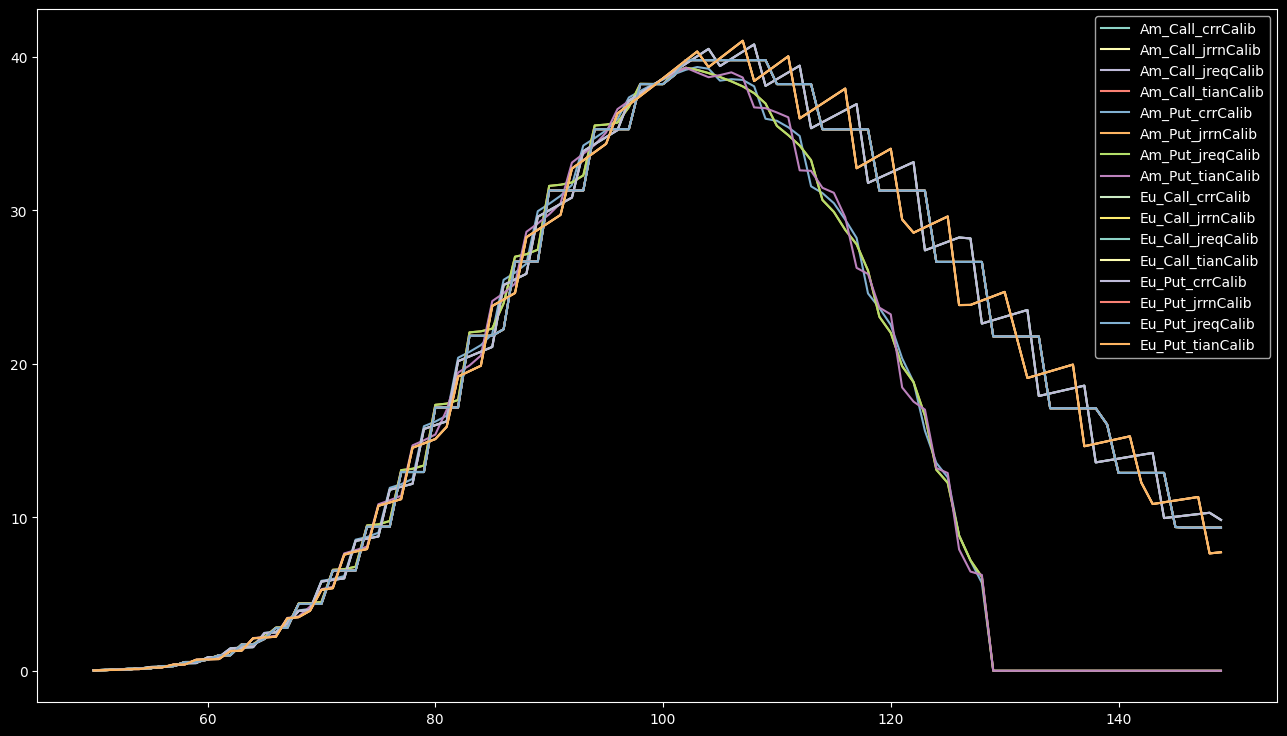

In [44]:
vega_df.plot(figsize=(16,9))

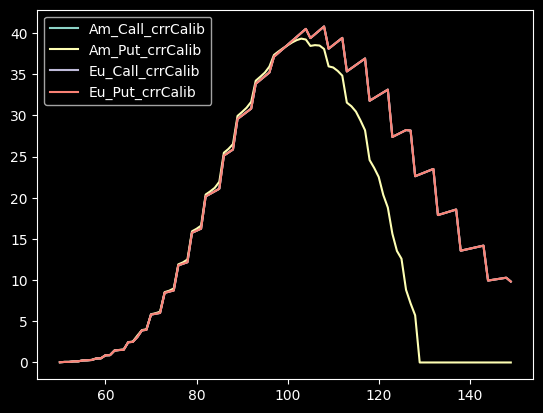

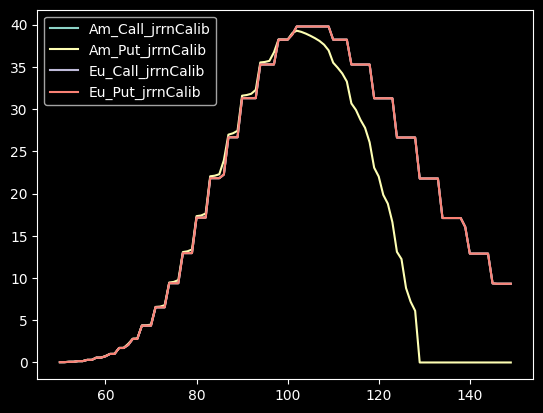

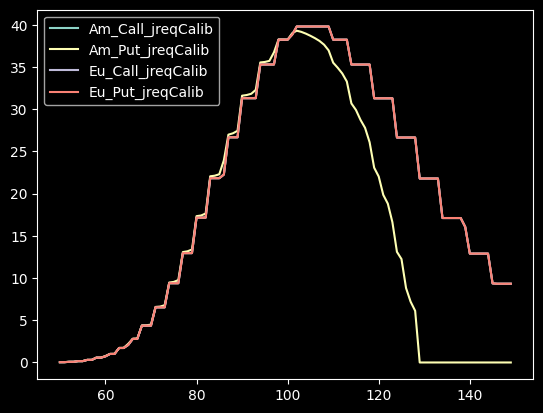

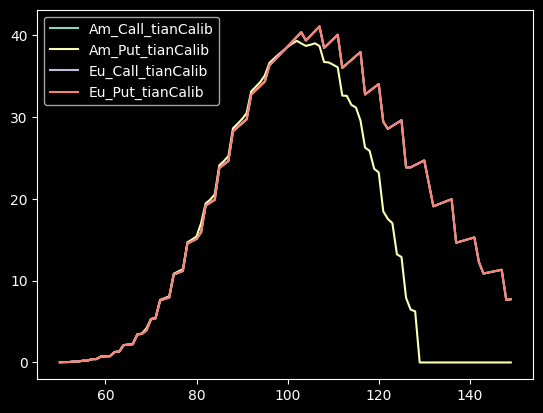

In [45]:
plot_sort_calib(vega_df)

<Axes: >

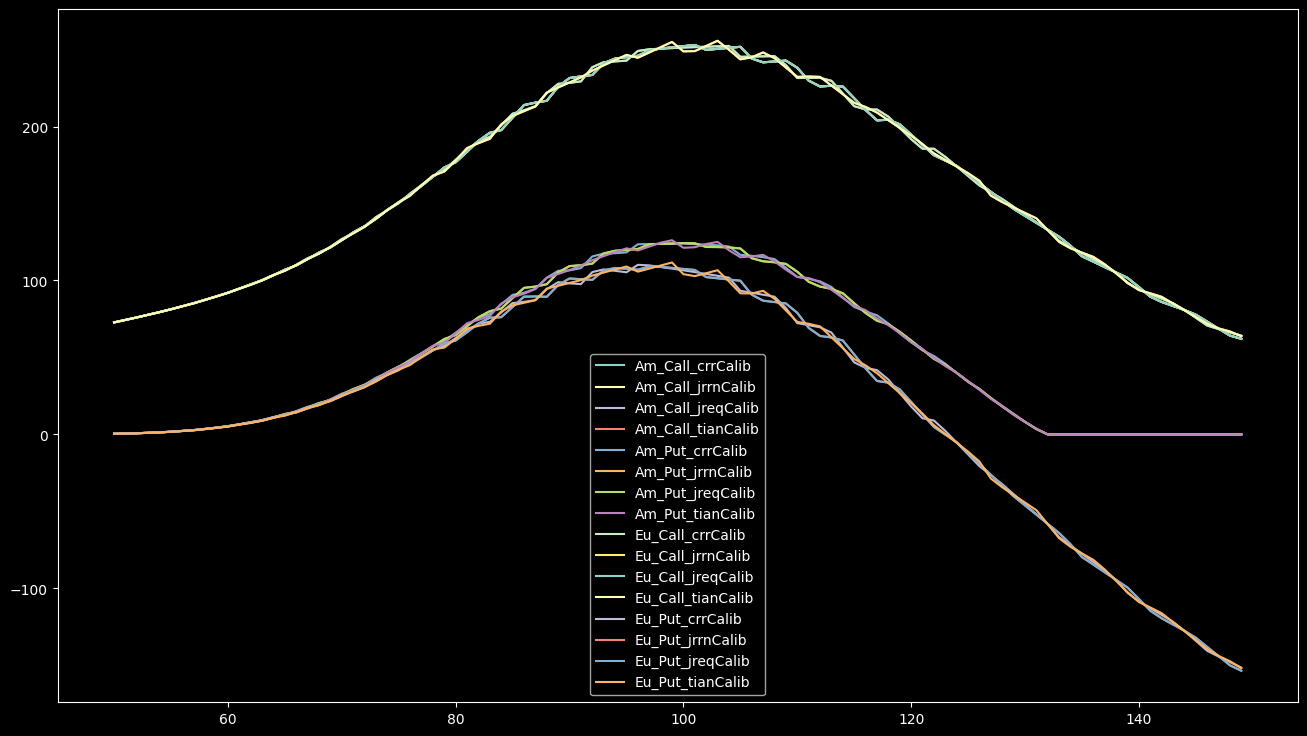

In [46]:
theta_df.plot(figsize=(16,9))

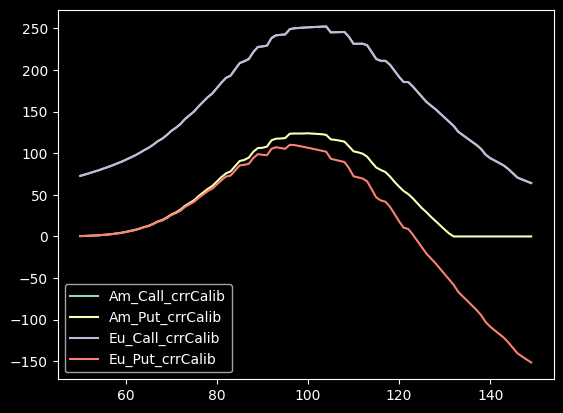

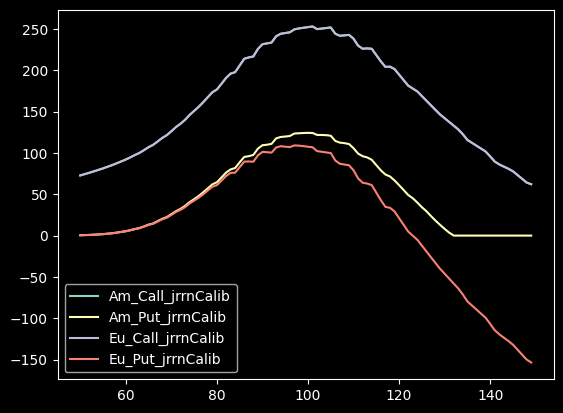

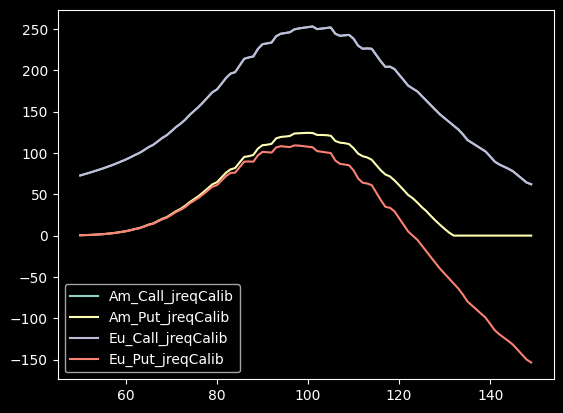

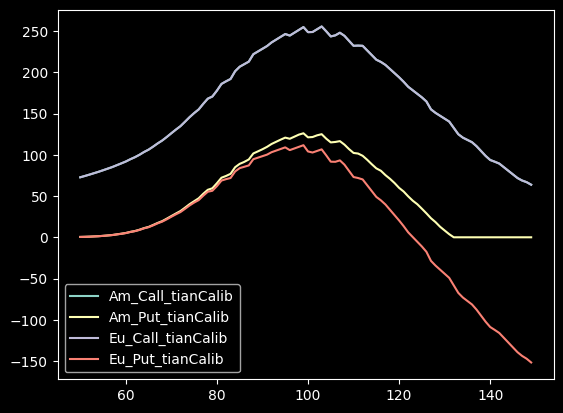

In [47]:
plot_sort_calib(theta_df)

<Axes: >

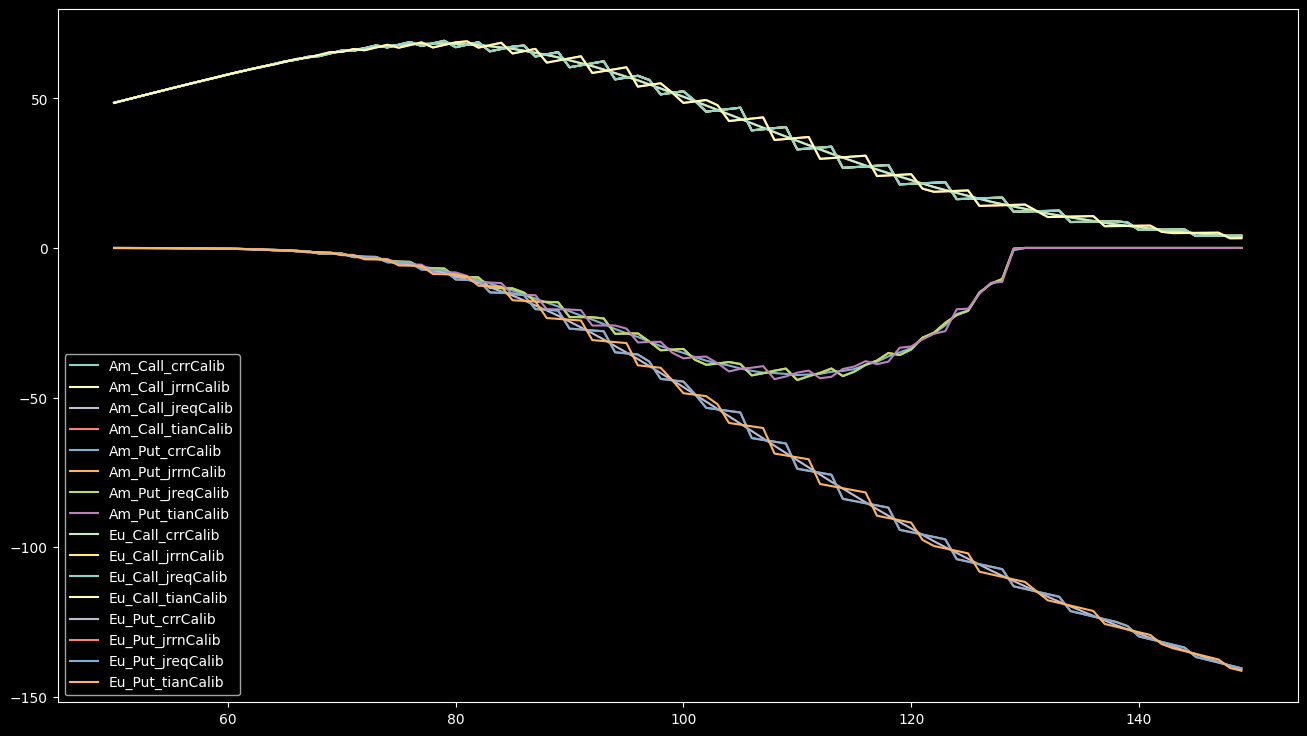

In [48]:
rho_df.plot(figsize=(16,9))

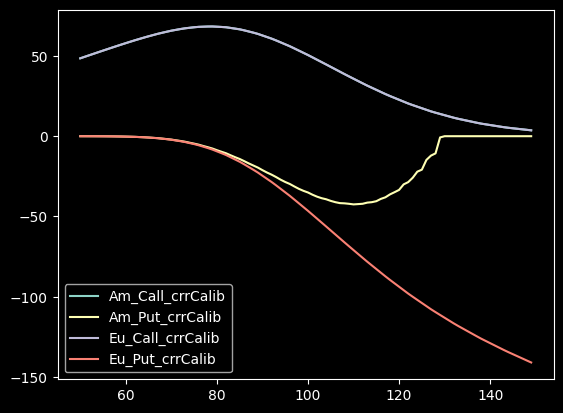

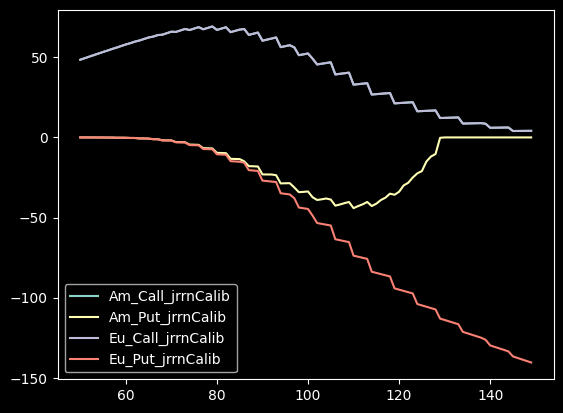

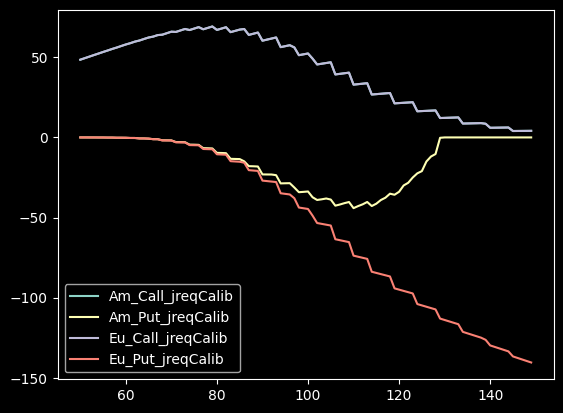

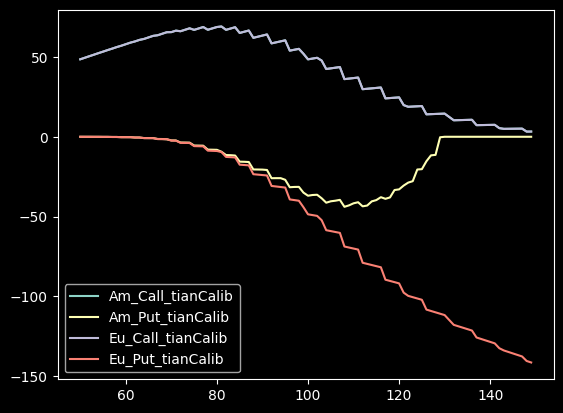

In [49]:
plot_sort_calib(rho_df)